In [1]:
import json
import numpy as np
import h5py
import matplotlib.pyplot as plt

In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/

In [118]:
class ImageHandler:
    def __init__(self, path='data02/'):
        self.map_images = []
        with open(path + 'map.json','r') as file:
            map_info = json.load(file)
            for image_name in map_info['im_paths']:
                self.map_images.append(plt.imread(path + image_name))
        self.map_images = np.array(self.map_images)
        
        self.query_images = []
        with open(path + 'query.json','r') as file:
            query_info = json.load(file)
            for image_name in query_info['im_paths']:
                self.query_images.append(plt.imread(path + image_name))
        self.query_images = np.array(self.query_images)
        
    def map_image(self, i):
        return self.map_images[i]

    def query_image(self, i):
        return self.query_images[i]

def plot(images, cols=5, size=(20,10)):
    plt.figure(figsize=size)
    for i, image in enumerate(images):
        plt.subplot(len(images) / cols + 1, cols, i + 1)
        plt.imshow(image)
    plt.show()


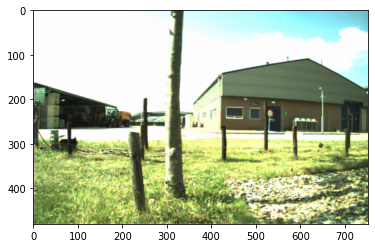

In [3]:
handler = ImageHandler()
a = handler.query_image(10)
plot(a)

In [4]:
from sklearn import decomposition

pca = decomposition.PCA(50)
map_data = np.copy(handler.map_images)
map_data = map_data.reshape(100, 480*752*3)
pca.fit(map_data)

PCA(n_components=50)

/home/atlantis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for inte

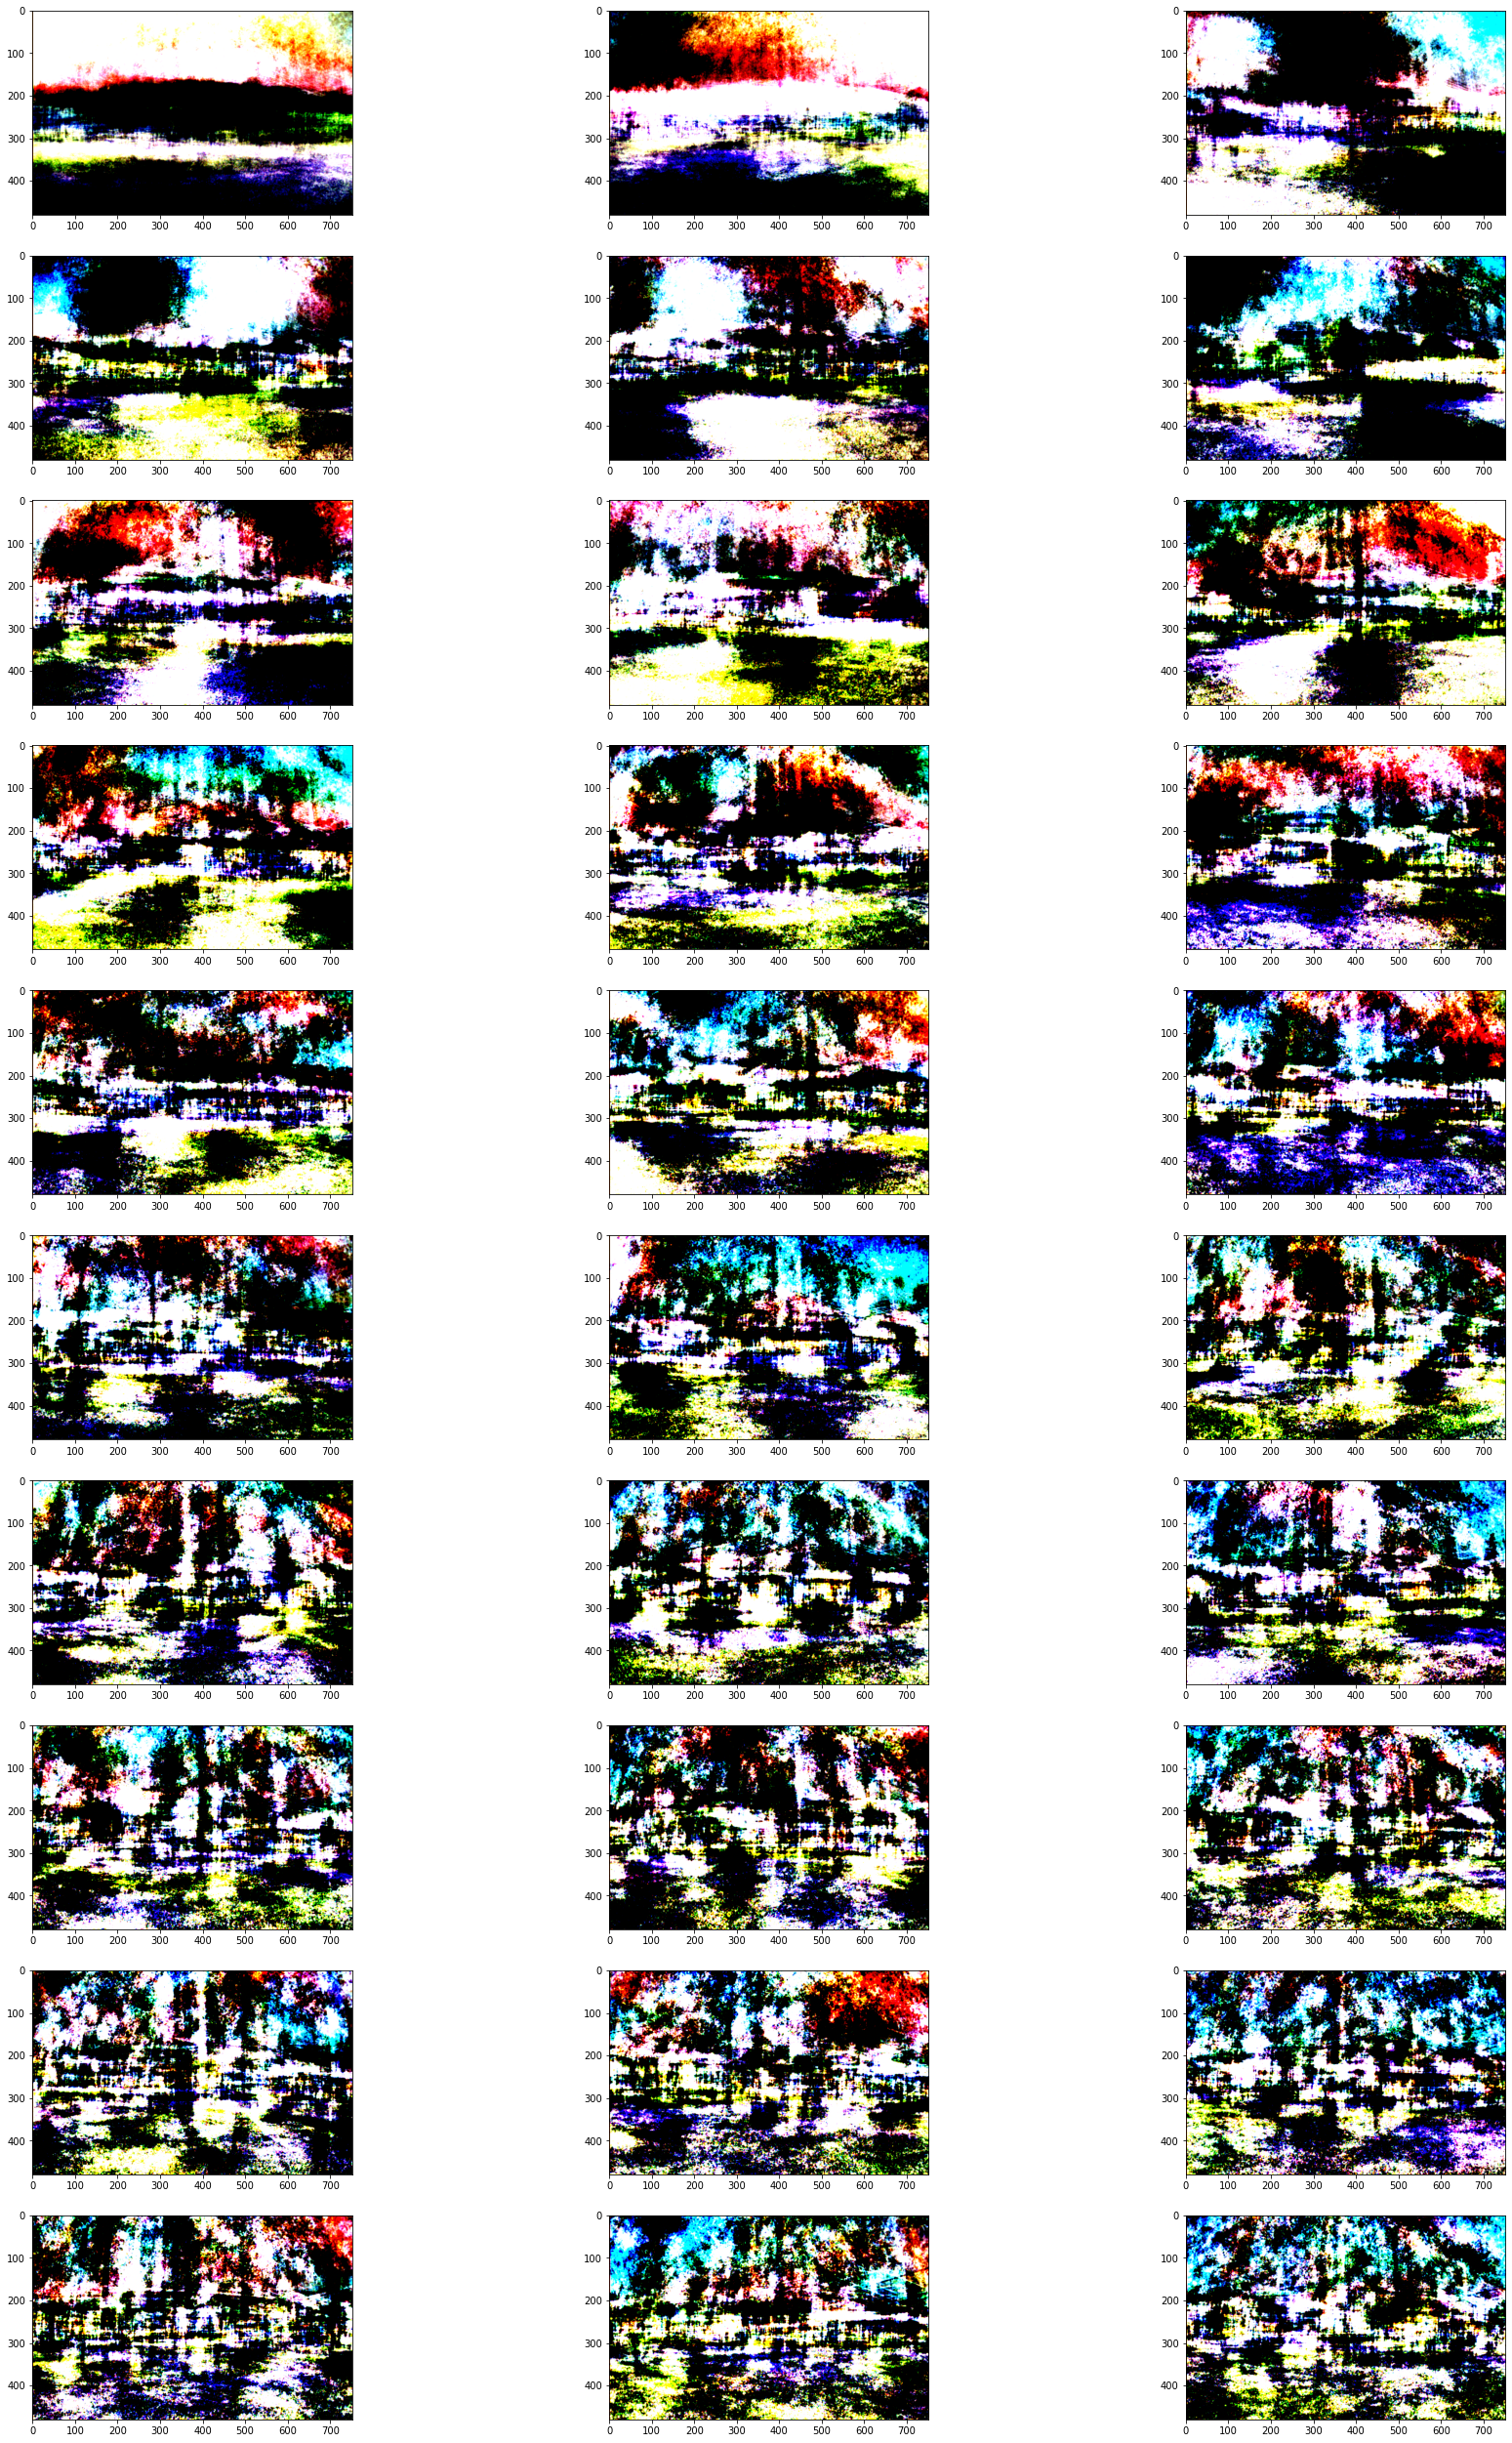

In [34]:
eigenvalues = pca.components_.reshape(50,480,752,3)

# enable if you want to see the eingenfaces:
plot(eigenvalues[:30]*2000, cols=3,size=(30,50))

In [109]:
def to_featurespace(pca, img):   
    return pca.transform(img.reshape(1, 480*752*3))
    
def from_featurespace(pca, features):
    return pca.inverse_transform(features).reshape(480, 752, 3)

/home/atlantis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


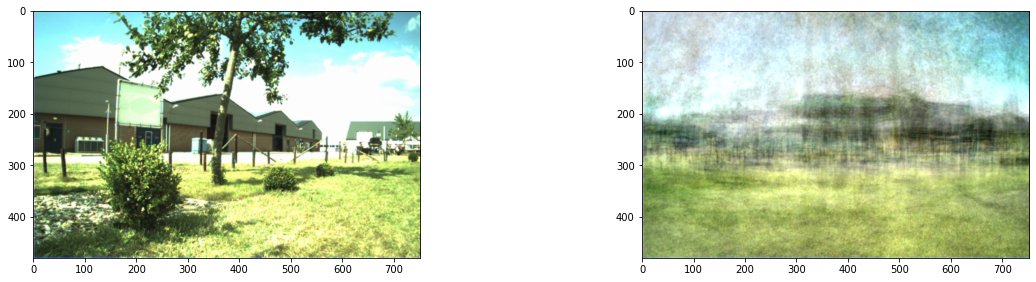

In [128]:
# Non seen data:
img_orig = handler.query_image(20)
img = to_featurespace(pca, img)
img = from_featurespace(pca, img)
plot([img_orig, img], cols=2)

/home/atlantis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


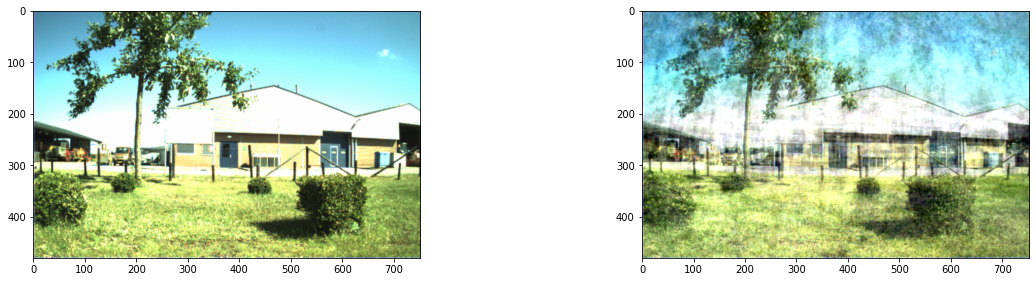

In [130]:
# alredy seen data:
img_orig = handler.map_image(20)
img = to_featurespace(pca, img_orig)
img = from_featurespace(pca, img)
plot([img_orig, img], cols=2)

/home/atlantis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


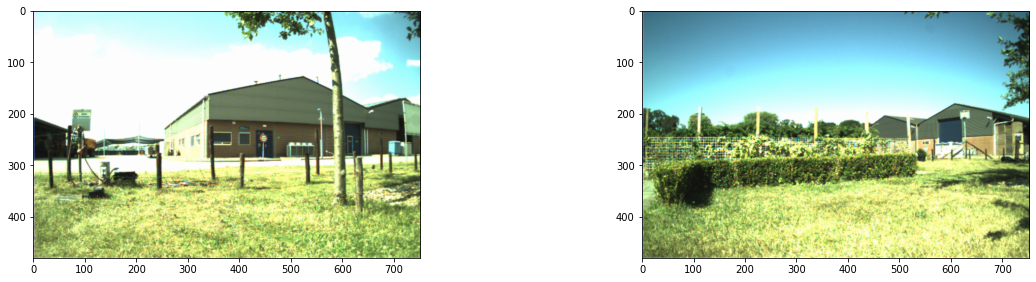

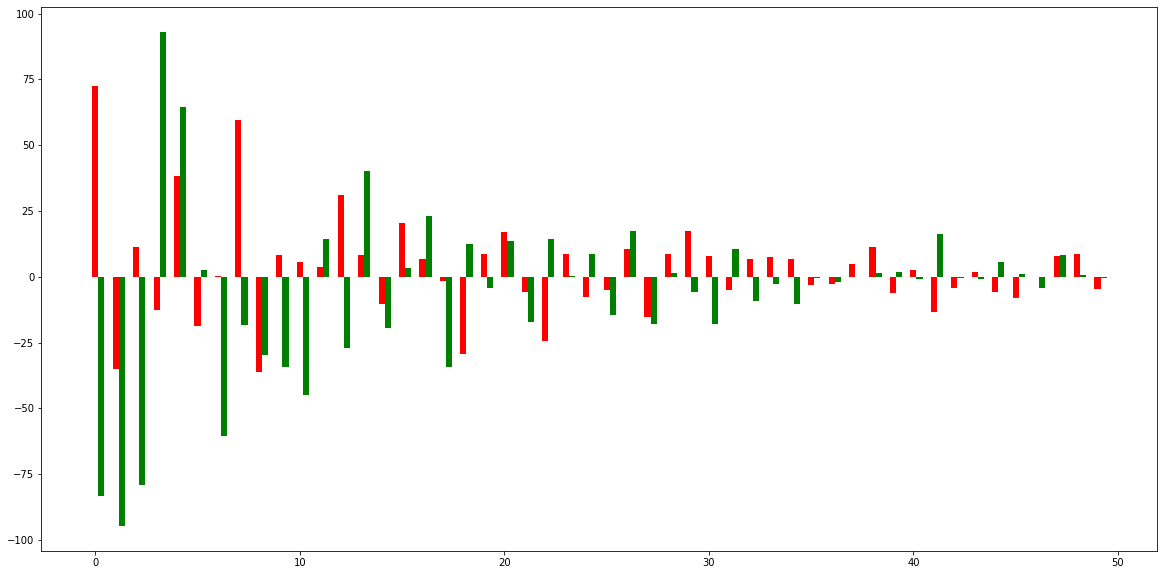

276.17685


/home/atlantis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


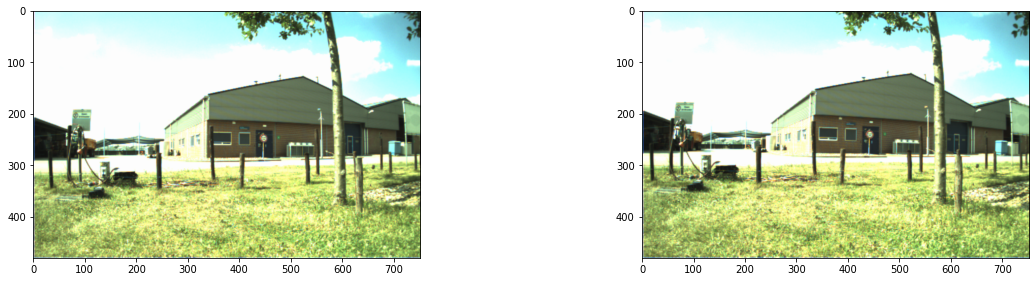

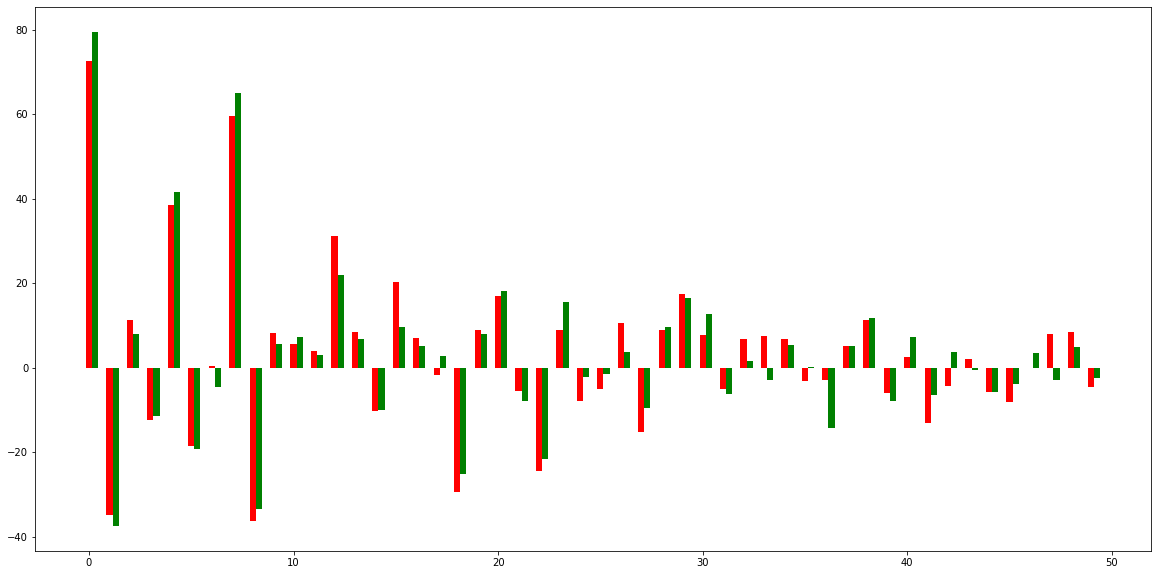

34.66436


In [127]:
def plot_hist(pca, img, color):  
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    x = np.array([i for i in range(50)])
    features = to_featurespace(pca, img).flatten()
    ax.bar(x+0.3*i, features, width=0.3, color=color)
    plt.show()
    
    print(features[:10])

def plot_hist_mult(pca, img, color):
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    x = np.array([i for i in range(50)])
    for i in range(len(img)):
        features = to_featurespace(pca, img[i]).flatten()
        ax.bar(x+0.3*i, features, width=0.3, color=color[i])
    plt.show()
    
def featurespace_distance(img1, img2):    
    features1 = to_featurespace(pca, img1).flatten()
    features2 = to_featurespace(pca, img2).flatten()
    dist = np.sqrt(np.sum(np.square(features1 - features2)))
    return dist
    
    
img = handler.query_image(0)
img1 = handler.map_image(2)
plot([img, img1], cols=2)
plot_hist_mult(pca, [img, img1], ['r', 'g'])
print(featurespace_distance(img, img1))


img = handler.query_image(0)
img1 = handler.query_image(4)
plot([img, img1], cols=2)
plot_hist_mult(pca, [img, img1], ['r', 'g'])
print(featurespace_distance(img, img1))
                               

/home/atlantis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


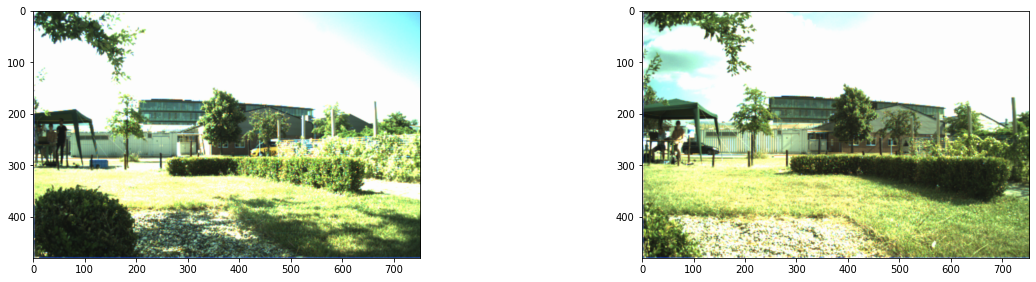

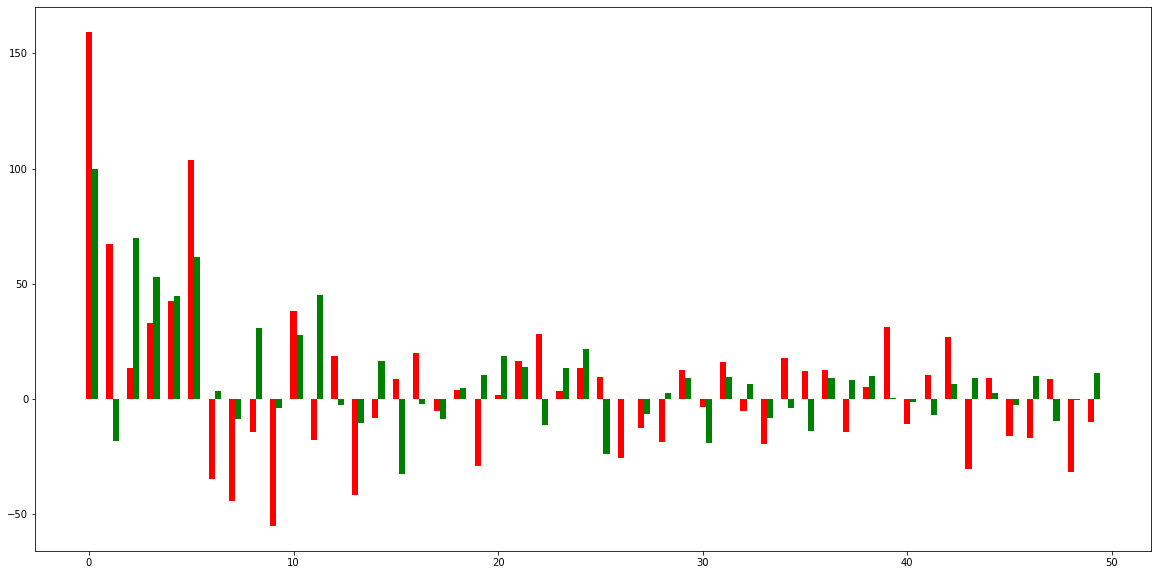

214.78214


In [125]:
img = handler.map_image(61)
img1 = handler.query_image(86)
plot([img, img1], cols=2)
plot_hist_mult(pca, [img, img1], ['r', 'g'])
print(featurespace_distance(img, img1))